# **Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Menentukan setiap subdirectory :

In [ ]:
#Import Library OS
import os

train_infected_dir = os.path.join('/content/drive/MyDrive/Dataset Malaria/Training/Infected')

train_normal_dir = os.path.join('/content/drive/MyDrive/Dataset Malaria/Training/Normal')

valid_infected_dir = os.path.join('/content/drive/MyDrive/Dataset Malaria/Validation/Infected')

valid_normal_dir = os.path.join('/content/drive/MyDrive/Dataset Malaria/Validation/Normal')

Melihat seperti apa nama file di training directory infected dan normal :

In [ ]:
train_infected_names = os.listdir(train_infected_dir)
print(train_infected_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

validation_infected_names = os.listdir(valid_infected_dir)
print(validation_infected_names[:10])

validation_normal_names = os.listdir(valid_normal_dir)
print(validation_normal_names[:10])

['C49P10thinF_IMG_20150724_102330_cell_226.png', 'C49P10thinF_IMG_20150724_102330_cell_227.png', 'C49P10thinF_IMG_20150724_102330_cell_233.png', 'C49P10thinF_IMG_20150724_102330_cell_234.png', 'C49P10thinF_IMG_20150724_102330_cell_230.png', 'C49P10thinF_IMG_20150724_102330_cell_225.png', 'C49P10thinF_IMG_20150724_102330_cell_232.png', 'C49P10thinF_IMG_20150724_102330_cell_231.png', 'C49P10thinF_IMG_20150724_102330_cell_229.png', 'C49P10thinF_IMG_20150724_102330_cell_228.png']
['C227ThinF_IMG_20151112_135308_cell_60.png', 'C227ThinF_IMG_20151112_135308_cell_80.png', 'C227ThinF_IMG_20151112_135308_cell_109.png', 'C227ThinF_IMG_20151112_135308_cell_78.png', 'C227ThinF_IMG_20151112_135308_cell_100.png', 'C227ThinF_IMG_20151112_135308_cell_203.png', 'C227ThinF_IMG_20151112_135308_cell_186.png', 'C227ThinF_IMG_20151112_135308_cell_179.png', 'C227ThinF_IMG_20151112_135308_cell_217.png', 'C233ThinF_IMG_20151112_160635_cell_62.png']
['C33P1thinF_IMG_20150619_121411a_cell_190.png', 'C33P1thinF_I

Mencari informasi berapa total images dari darah yang infected dan normal di directory :

In [ ]:
print('total training infected images:', len(os.listdir(train_infected_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total validation infected images:', len(os.listdir(valid_infected_dir)))
print('total validation normal images:', len(os.listdir(valid_normal_dir)))

total training infected images: 1400
total training normal images: 1400
total validation infected images: 600
total validation normal images: 600


Melihat beberapa pictures. Hal pertama yang dilakukan adalah melakukan konfigurasi matplot parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Menampilkan 8 batch dari 8 gambar darah infected and 8 gambar darah normal

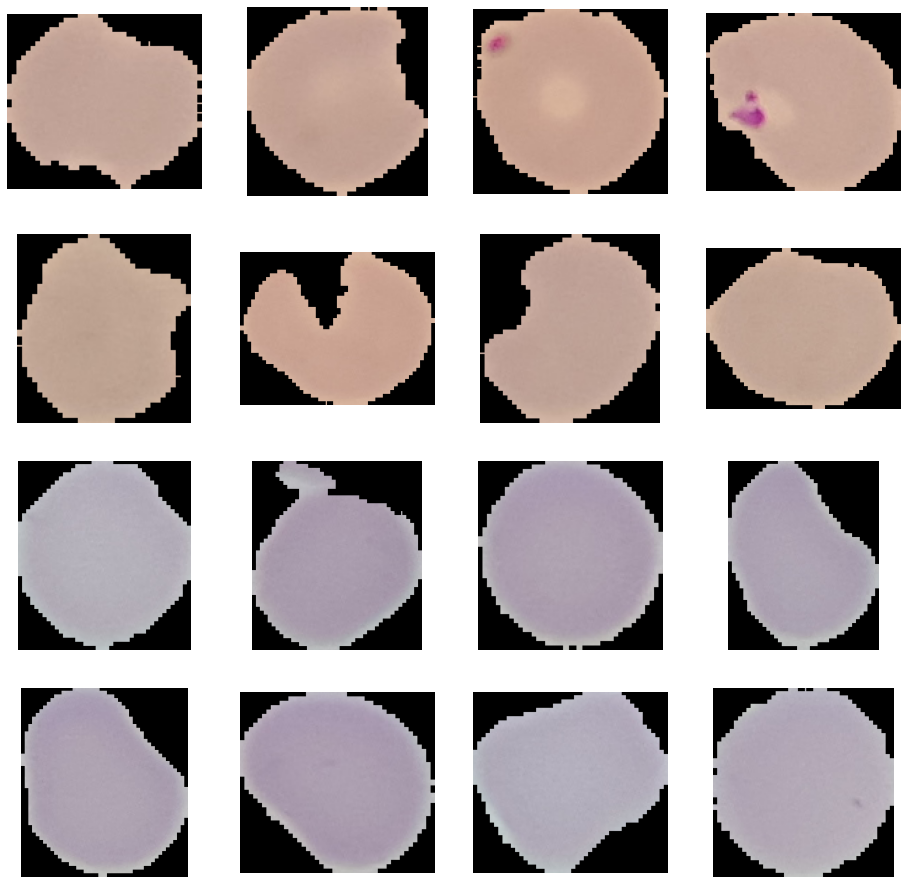

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
infected_pic = [os.path.join(train_infected_dir, fname) 
                for fname in train_infected_names[pic_index-8:pic_index]]
normal_pic = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_names[pic_index-8:pic_index]]

for i, img_path in enumerate(infected_pic + normal_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Data Preprocessing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Normalisasi semua gambar (Rescaled by 1/255)
train_datagen = ImageDataGenerator(rescale = 1/255., rotation_range = 20,
                                   width_shift_range = 0.05, height_shift_range= 0.05,
                                   shear_range = 0.05,
                                   zoom_range = 0.05,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 50 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataset Malaria/Training',  # Path dari file training
        classes = ['Infected', 'Normal'],
        target_size=(224, 224),  # Standarisasi ukuran gambar menjadi 224x224
        batch_size=50,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 10 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataset Malaria/Validation',  # Path dari file validation
        classes = ['Infected', 'Normal'],
        target_size=(224, 224),  # Standarisasi ukuran gambar menjadi 224x224
        batch_size=10,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 2800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


# Building the Model from Scratch 

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
import tensorflow as tf

base_model = VGG16(input_shape = (224, 224, 3),
                   include_top = False,
                   weights = 'imagenet')

for layer in base_model.layers:
  layer.trainable = False

# Flatten
x = layers.Flatten()(base_model.output)

# Fully Connected Layer
x = layers.Dense(256, activation = 'relu')(x)

# Dropout
x = layers.Dropout(0.3)(x)

# Output layer
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

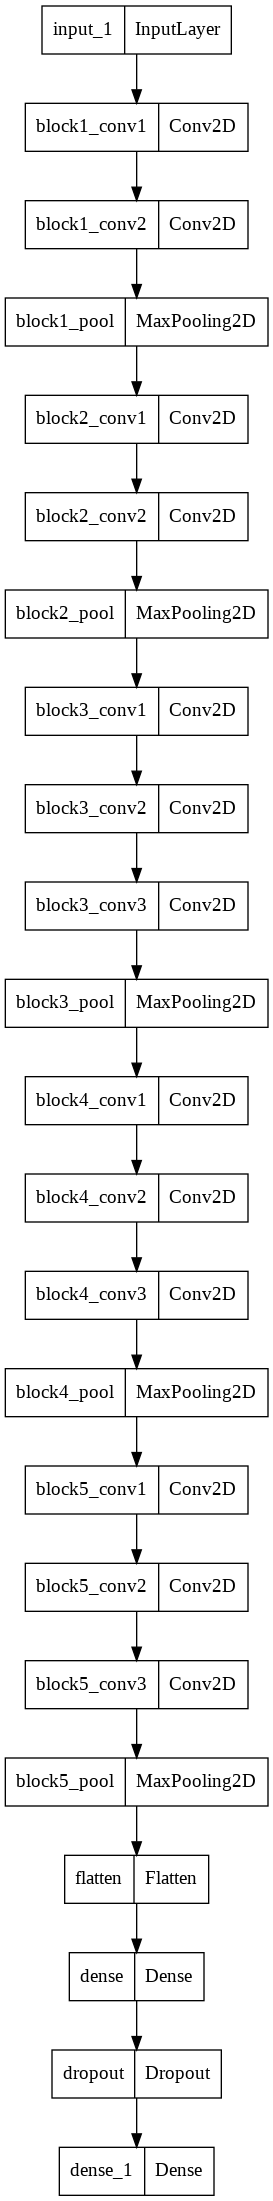

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [ ]:
history = model.fit(train_generator,
      steps_per_epoch=10,  
      epochs=20,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=10)

Epoch 1/20
10/10 [==============================] - 287s 28s/step - loss: 2.2831 - accuracy: 0.5820 - val_loss: 0.5284 - val_accuracy: 0.6900
Epoch 2/20
10/10 [==============================] - 278s 27s/step - loss: 0.5739 - accuracy: 0.7900 - val_loss: 0.8373 - val_accuracy: 0.6200
Epoch 3/20
10/10 [==============================] - 281s 28s/step - loss: 0.5386 - accuracy: 0.7980 - val_loss: 0.1489 - val_accuracy: 0.9600
Epoch 4/20
10/10 [==============================] - 275s 27s/step - loss: 0.3787 - accuracy: 0.8440 - val_loss: 0.2509 - val_accuracy: 0.9200
Epoch 5/20
10/10 [==============================] - 276s 28s/step - loss: 0.3193 - accuracy: 0.8580 - val_loss: 0.7748 - val_accuracy: 0.5400
Epoch 6/20
10/10 [==============================] - 273s 27s/step - loss: 0.4454 - accuracy: 0.8140 - val_loss: 0.7860 - val_accuracy: 0.5100
Epoch 7/20
10/10 [==============================] - 274s 27s/step - loss: 0.3365 - accuracy: 0.8480 - val_loss: 0.2693 - val_accuracy: 0.9000
Epoch 

Evaluasi accuracy model:

In [ ]:
model.evaluate(validation_generator)

120/120 [==============================] - 534s 4s/step - loss: 0.5427 - accuracy: 0.7167


[0.5426902770996094, 0.7166666388511658]

In [ ]:
model.save('/content/drive/MyDrive/model_VGG2.h5')

# **Re-Training Model**

## Load Model

In [ ]:
from keras.models import load_model

In [ ]:
retrain_model = load_model('/content/drive/MyDrive/model_VGG2.h5') # load model yang pernah disave dalam drive

In [ ]:
retrain_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**Training Ulang (Re-Training)**

In [ ]:
history = retrain_model.fit(train_generator,
      steps_per_epoch=10,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=10)

Epoch 1/10
10/10 [==============================] - 321s 31s/step - loss: 0.2361 - accuracy: 0.9060 - val_loss: 0.3881 - val_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 314s 31s/step - loss: 0.2737 - accuracy: 0.9000 - val_loss: 1.0038 - val_accuracy: 0.5500
Epoch 3/10
10/10 [==============================] - 313s 31s/step - loss: 0.2901 - accuracy: 0.8960 - val_loss: 0.5886 - val_accuracy: 0.6800
Epoch 4/10
10/10 [==============================] - 314s 31s/step - loss: 0.2967 - accuracy: 0.8640 - val_loss: 0.2853 - val_accuracy: 0.8700
Epoch 5/10
10/10 [==============================] - 310s 31s/step - loss: 0.2246 - accuracy: 0.9080 - val_loss: 0.2700 - val_accuracy: 0.8800
Epoch 6/10
10/10 [==============================] - 308s 31s/step - loss: 0.2680 - accuracy: 0.8840 - val_loss: 0.2091 - val_accuracy: 0.9100
Epoch 7/10
10/10 [==============================] - 309s 31s/step - loss: 0.2320 - accuracy: 0.8980 - val_loss: 0.2805 - val_accuracy: 0.8800
Epoch 

In [ ]:
retrain_model.evaluate(validation_generator)

120/120 [==============================] - 610s 5s/step - loss: 0.4786 - accuracy: 0.7650


[0.4786178171634674, 0.7649999856948853]

**Save Model Lagi**

In [ ]:
retrain_model.save('/content/drive/MyDrive/model_VGG2_retraining(10).h5') # save retraining model dalam drive

# **Testing**

Load Model

In [ ]:
from keras.models import load_model

In [ ]:
model_fix = load_model('/content/drive/MyDrive/model_VGG2_retraining(10).h5') # load model yang pernah disave dalam drive

Saving Infected 10.png to Infected 10.png
Saving Infected 11.png to Infected 11.png
Saving Infected 12.png to Infected 12.png
Saving Infected 13.png to Infected 13.png
Saving Infected 14.png to Infected 14.png
Saving Infected 15.png to Infected 15.png
Saving Infected 16.png to Infected 16.png
Saving Infected 17.png to Infected 17.png
Saving Infected 18.png to Infected 18.png
Saving Infected 19.png to Infected 19.png
Saving Infected 20.png to Infected 20.png
Saving Infected 21.png to Infected 21.png
Saving Infected 22.png to Infected 22.png
Saving Infected 23.png to Infected 23.png
Saving Infected 24.png to Infected 24.png
Saving Infected 25.png to Infected 25.png
[0.]
Infected 10.png ini adalah kelas infected
[0.]
Infected 11.png ini adalah kelas infected
[0.]
Infected 12.png ini adalah kelas infected
[0.]
Infected 13.png ini adalah kelas infected
[0.]
Infected 14.png ini adalah kelas infected
[0.]
Infected 15.png ini adalah kelas infected
[0.]
Infected 16.png ini adalah kelas infected

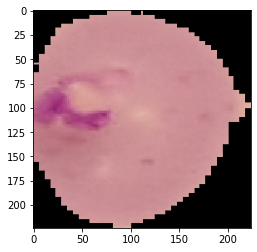

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn

  # Normalize input images
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img) # ubah image menjadi array 3D
  plt.imshow(x/255.) # tampilkan image
  x = np.expand_dims(x, axis=0) # ubah data image menjadi array 4D
  images = np.vstack([x]) # pindahkan isi variable x ke images

  # Predicting images
  classes = model_fix.predict(images, batch_size=10) # Jika image upload banyak, akan diambil 10 per 10 (batch size=10)
  print(classes[0]) # hasil prediksi merupakan array 2D, jadi perlu classes[0]
  if classes[0]<0.5:
    print(fn + " ini adalah kelas infected")
  else:
    print(fn + " ini adalah kelas normal")